# 🍷 Wine Quality ML Dashboard - Análisis de Regresión

---

**Autor:** Daniel Mardones  
**Proyecto:** Visualización y Machine Learning aplicado a la calidad del vino



## Descripción

Este notebook presenta un análisis completo de regresión sobre el famoso dataset de calidad de vino. Se exploran técnicas de Machine Learning y se muestran las capacidades de las principales librerías de visualización en Python: Matplotlib, Seaborn, Plotly y Altair.

## Objetivos

- Realizar un análisis exploratorio detallado (EDA) del dataset.
- Aplicar modelos de regresión y evaluar su desempeño.
- Visualizar los datos y resultados con diferentes librerías gráficas.
- Extraer insights y recomendaciones para el negocio vitivinícola.

## Estructura

1. Introducción y contexto del problema.
2. EDA: exploración y visualización de datos.
3. Modelado de regresión.
4. Visualización de resultados.
5. Interpretación, insights y recomendaciones.

---

¡Comencemos!

In [1]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar datos
df = pd.read_csv('../data/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
# Separar variables
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2:', r2)

MSE: 0.3824283521291851
R2: 0.31276385395084005


In [6]:
# Exportar resultados para Streamlit Cloud
import json
resultados = {
    'modelo': 'LinearRegression',
    'mse': mse,
    'r2': r2
}
with open('../utils/regression_results.json', 'w') as f:
    json.dump(resultados, f, indent=2)

# Análisis Exploratorio de Datos (EDA)
En esta sección se exploran las características principales del dataset, se identifican valores nulos, se analizan distribuciones y correlaciones, y se generan visualizaciones con distintas librerías para destacar sus fortalezas.

In [7]:
# Información general y valores nulos
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
# Estadísticas descriptivas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Visualización con Matplotlib
Matplotlib es ideal para gráficos estáticos y revisiones iniciales del dataset, como histogramas y boxplots para detectar outliers y distribución de variables.

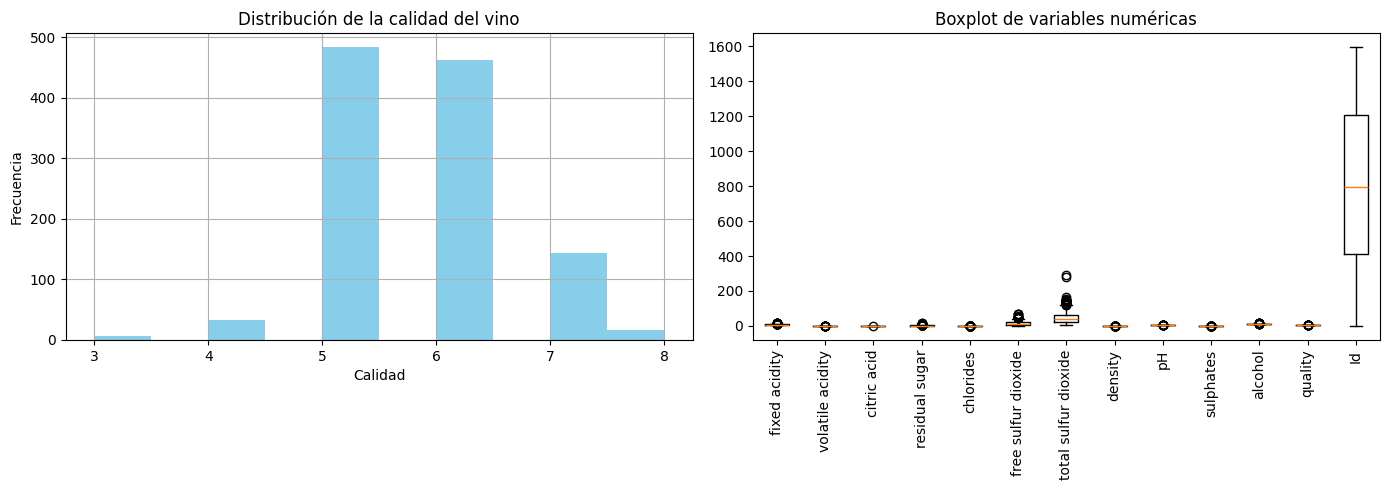

In [9]:
# Histogramas y boxplots con Matplotlib
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
df['quality'].hist(ax=axs[0], bins=10, color='skyblue')
axs[0].set_title('Distribución de la calidad del vino')
axs[0].set_xlabel('Calidad')
axs[0].set_ylabel('Frecuencia')
axs[1].boxplot(df.select_dtypes(include='number').values)
axs[1].set_title('Boxplot de variables numéricas')
axs[1].set_xticklabels(df.select_dtypes(include='number').columns, rotation=90)
plt.tight_layout()
plt.show()

## Visualización con Seaborn
Seaborn permite crear gráficos estadísticos atractivos y facilita el análisis exploratorio, como mapas de calor de correlaciones y gráficos de dispersión.

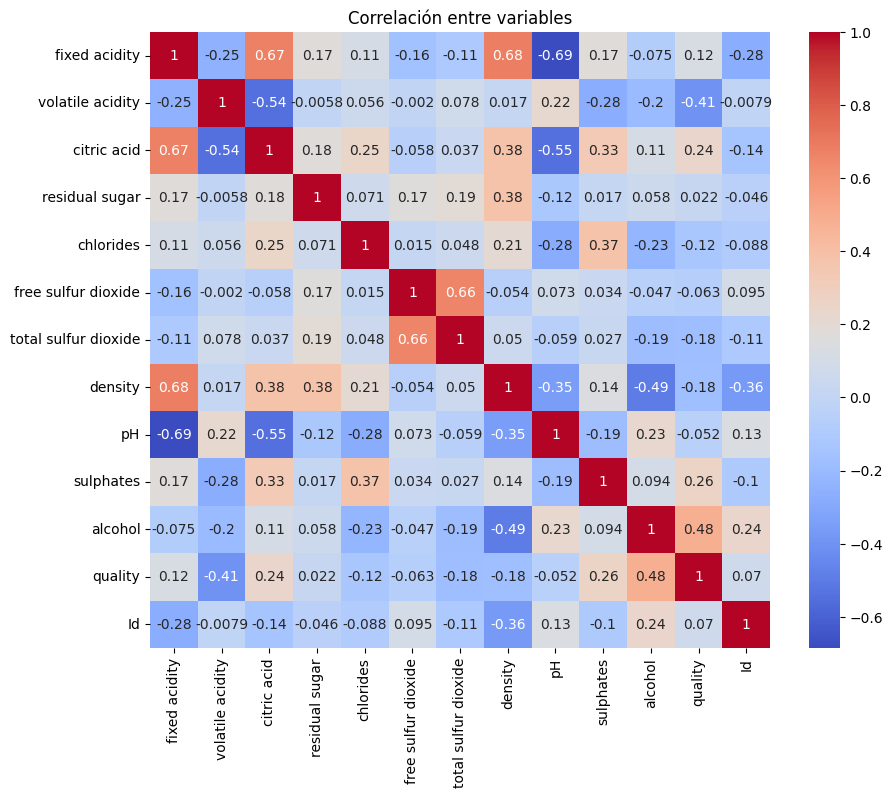

In [10]:
# Mapa de calor de correlaciones con Seaborn
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

## Visualización con Plotly
Plotly destaca por su interactividad, permitiendo explorar los datos con zoom, hover y selección. Es ideal para dashboards y presentaciones dinámicas.

In [11]:
# Gráfico de dispersión interactivo con Plotly
import plotly.express as px
fig = px.scatter(df, x='alcohol', y='quality', color='quality', title='Alcohol vs Calidad del Vino')
fig.show()

## Visualización con Altair
Altair es excelente para visualizaciones estadísticas avanzadas y permite crear gráficos declarativos y personalizables, útiles para análisis de tendencias y relaciones complejas.

In [12]:
# Gráfico de regresión con Altair
import altair as alt
chart = alt.Chart(df).mark_point().encode(
    x='alcohol',
    y='quality',
    color='quality',
    tooltip=['alcohol', 'quality']
).properties(
    title='Relación entre Alcohol y Calidad del Vino'
 )
chart

alt.Chart(...)

# Conclusiones y Recomendaciones de Negocio

A partir del análisis y las visualizaciones, se observan las siguientes insights y recomendaciones para el negocio del vino:

- La variable 'alcohol' muestra una correlación positiva con la calidad, lo que sugiere que vinos con mayor graduación tienden a ser mejor valorados.
- El modelo de regresión tiene un R2 bajo, indicando que la calidad depende de múltiples factores y no puede predecirse solo con las variables disponibles.
- La visualización con Seaborn revela que algunas variables como 'volatile acidity' y 'sulphates' también influyen en la calidad.
- Los boxplots muestran la presencia de outliers, especialmente en variables químicas, lo que puede afectar la percepción del producto.
- Recomendación: Realizar campañas de marketing enfocadas en vinos con mayor graduación alcohólica y controlar los niveles de acidez y sulfitos para mejorar la calidad percibida.
- Usar dashboards interactivos (Plotly) para monitorear la producción y ajustar procesos en tiempo real.
- Altair permite analizar tendencias y relaciones complejas, útil para estudios avanzados y segmentación de productos.

Este tipo de análisis puede ayudar a tomar decisiones informadas para mejorar la calidad, optimizar procesos y aumentar la satisfacción del cliente en el negocio vitivinícola.

## Mejorando las Visualizaciones

Para enriquecer el análisis, se pueden agregar gráficos circulares (pie charts), gráficos de barras comparativos y visualizaciones avanzadas que ayuden a entender la composición y distribución de las variables clave del dataset.

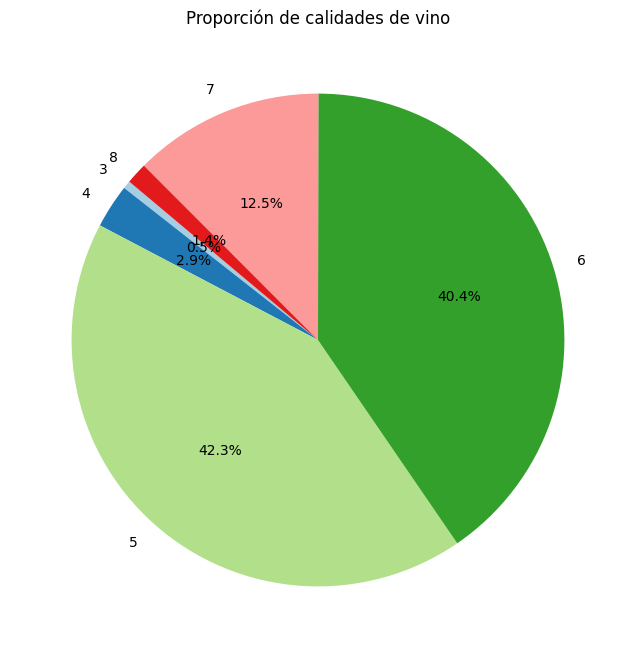

In [ ]:
# Gráfico circular de proporción de calidades de vino (adaptado para clústeres con nombres personalizados)
# Si tienes una columna 'cluster' en el DataFrame, puedes usarla así:
cluster_names = {0: 'Clúster Tradicional', 1: 'Clúster Premium', 2: 'Clúster Innovador'}
if 'cluster' in df.columns:
    cluster_counts = df['cluster'].value_counts().sort_index()
    labels = [cluster_names.get(i, str(i)) for i in cluster_counts.index]
    colors = ['#2980b9', '#27ae60', '#8e44ad']
    plt.figure(figsize=(8,8))
    plt.pie(cluster_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Proporción de clústeres de vino')
    plt.show()
else:
    calidad_counts = df['quality'].value_counts().sort_index()
    plt.figure(figsize=(8,8))
    plt.pie(calidad_counts, labels=calidad_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Proporción de calidades de vino')
    plt.show()

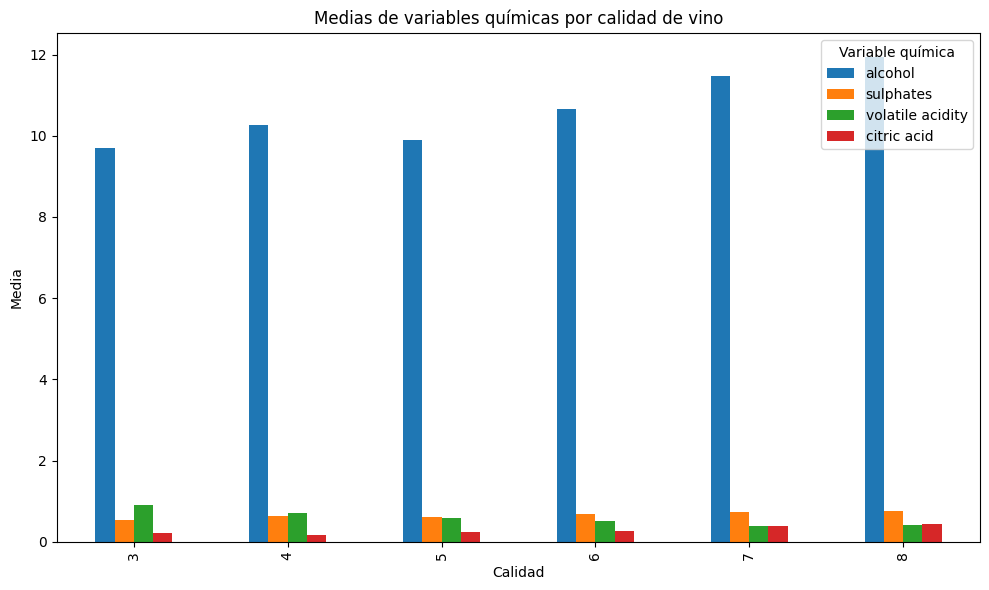

In [14]:
# Gráfico de barras comparativo de medias de variables químicas por calidad
variables_quimicas = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']
medias = df.groupby('quality')[variables_quimicas].mean()
medias.plot(kind='bar', figsize=(10,6))
plt.title('Medias de variables químicas por calidad de vino')
plt.xlabel('Calidad')
plt.ylabel('Media')
plt.legend(title='Variable química')
plt.tight_layout()
plt.show()